# Exercise 1: Python Review for Contemporary Machine Learning
##### Submit By: 28 September, 2024

Item 1 [10 pts]: Simple Linear Regression
Create a Python class called SimpleLinearRegression that models a simple linear regression. This
class should have the following requirements:

Attributes:

• A public attribute coefficients, which will store the slope and intercept of the regression line.

• A private attribute __X_mean and __y_mean, which will store the means of the independent and dependent variables, respectively.

Methods:

• A public class method fit(X, y) that takes NumPy arrays X and y (independent and dependent variables) and calculates the slope and intercept for the regression line using the least squares method (as matrix operation). Store the slope and intercept in coefficients.

• A public instance method predict(X) that predicts the values of y based on the input NumPy array X and the stored coefficients.

• A private instance method __calculate_means(X, y) that computes and stores the means

Usage:

• Create an instance of the SimpleLinearRegression class.

• Call the fit method with the provided data to calculate the slope and intercept.

• Use the predict method to predict the values of y for a new dataset.

R2 Score Calculation:

• Add a public method r_squared(X, y) that computes and returns the coefficient of determination (R2). This score should measure how well the regression line fits the data, indicating the proportion of the variance in the dependent variable that is predictable from the independent variable. If ��!"#$%&'( is the sum of squared residuals, and ��)*)'( is the total sum of
squares, the �+ should be given by

�+ = 1 − ��!"#$%&'(
��)*)'(
    
R squared = 1 - (SS_residual / SS_total)

#di po gumana sir ang copy paste

Data Input and Output Using Excel Files:

• Modify the fit method so that instead of passing NumPy arrays directly, it reads the independent variable (X) and the dependent variable (y) from an Excel file.

• The Excel file will have two columns: the first for X (independent variable) and the second for y (dependent variable).

• After fitting the model, save the predicted values for X in a third column of the Excel file and
save it as a new file.

Plot the Fitted Regression Line:

• Add a public method plot_regression(X, y) that plots the fitted regression line using the calculated slope and intercept.

Plot the Residuals:

• Add another plotting method plot_residuals() that shows the residuals (the differences between the actual and predicted values) against the independent variable X.

Bonus (+3%): If the plot_regression() can have an optional argument, with data = False
which if set to True will plot the fitted regression line against the true values in the data within the same
plot.

## IMPORTS

In [1]:
# !pip install openpyxl

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os # for the try-except saving

In [3]:
class SimpleLinearRegression:
    def __init__(self):
        self.coefficients = (0, 0)
        self.__x_mean = None
        self.__y_mean = None

    def __calculate_means(self, x, y):
        self.__x_mean = np.mean(x)
        self.__y_mean = np.mean(y)

    def predict(self, x):
        """
        x : values of the independent variable (array)

        Predicts the dependent variable values for the indep variable x.

        """
        slope, intercept = self.coefficients
        return slope * x + intercept

    def fit(self, file:str):
        """
        file : string, required

        Reads data from an Excel file and fits a model.

        """

        df_raw = pd.read_excel(file)

        x = df_raw.iloc[:, 0].values
        y = df_raw.iloc[:, 1].values

        self.__calculate_means(x, y)

        num = np.sum((x - self.__x_mean) * (y - self.__y_mean))
        den = np.sum((x - self.__x_mean) ** 2)
        slope = num / den
        intercept = self.__y_mean - slope * self.__x_mean
        self.coefficients = (slope, intercept)

        df_raw['y_pred'] = self.predict(x)

        # "After fitting the model, save the predicted values for X in a third column of the Excel file and save it as a new file."
        try:
            file_path = 'new_predicted_values.xlsx'
            if os.path.exists(file_path):
                os.remove(file_path)
            df_raw.to_excel(file_path, index=False)
        except Exception:
            pass
   

    def r_squared(self, x, y):
        """
        x : values of the independent variable (array)
        y : values of the dependent variable (array)

        Calculates the R squared value (coefficient of determination).

        """
        y_pred = self.predict(x)
        ss_res = np.sum((y - y_pred) ** 2)
        ss_tot = np.sum((y - np.mean(y)) ** 2)
        r2 = 1 - (ss_res / ss_tot)
        return r2

    def plot_regression(self, x, y, data:bool=False):
        """
        x : values of the independent variable (array)
        y : values of the dependent variable (array)
        data: if set to true, also plots the actual data (boolean)

        Plots the fitted regression line. If data=True, plots the actual values as well.

        """
        plt.figure(figsize=(10, 10))

        y_pred = self.predict(x)
        plt.plot(x, y_pred, color='green', label='Fitted Line')

        # gagana lang if hindi default or data=true
        if data:
            plt.scatter(x, y, color='red', label='With actual y Data')

        plt.xlabel('x')
        plt.ylabel('y')
        plt.title('Fitted Regression Line')
        plt.legend()
        plt.grid(True)
        plt.grid(color='gray', linestyle='--', linewidth=0.5)
        plt.show()

    def plot_residuals(self, x, y):
        """
        x : values of the independent variable (array)
        y : values of the dependent variable (array)

        Plots the residuals against the independent variable x.

        """
        y_pred = self.predict(x)
        residuals = y - y_pred

        plt.figure(figsize=(10, 10))
        plt.scatter(x, residuals, color='green')
        plt.axhline(y=0, color='black', linestyle='dashed')
        plt.xlabel('x')
        plt.ylabel('Residuals')
        plt.title('Residuals Plot')
        plt.grid(True)
        plt.grid(color='gray', linestyle='--', linewidth=0.5)
        plt.show()

manual testing

R squared Score: -14.175958813470112


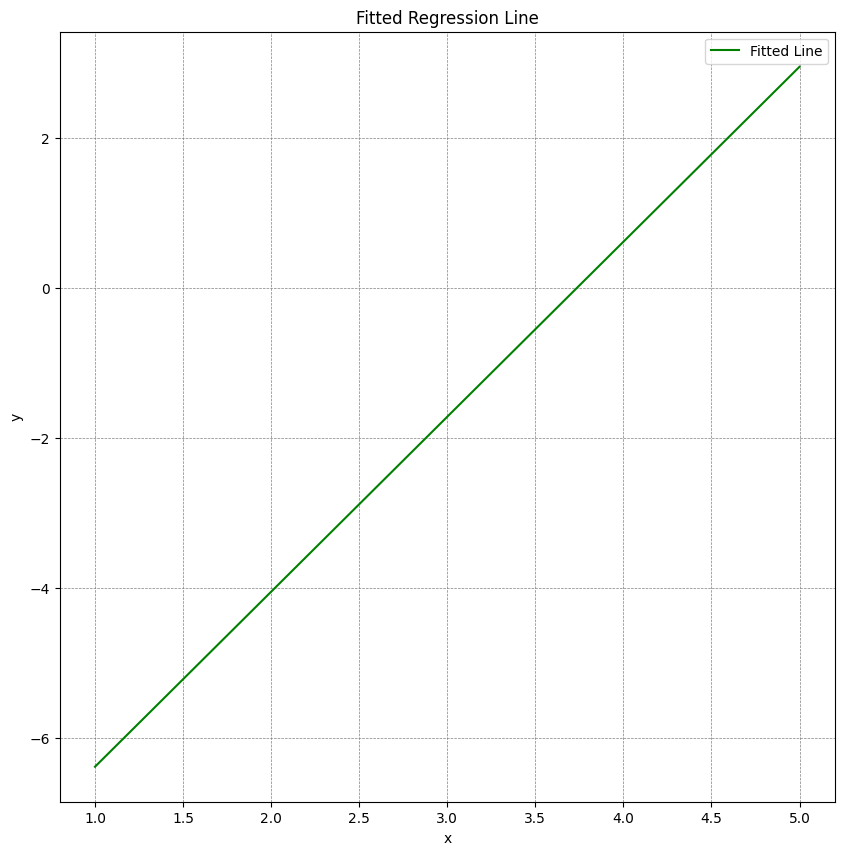

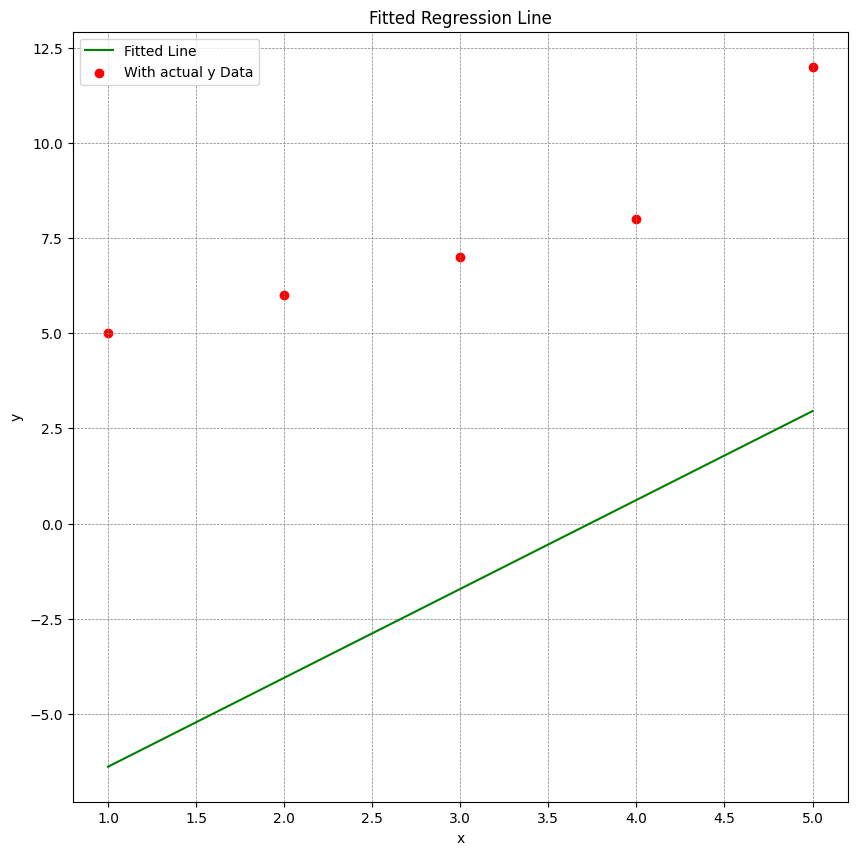

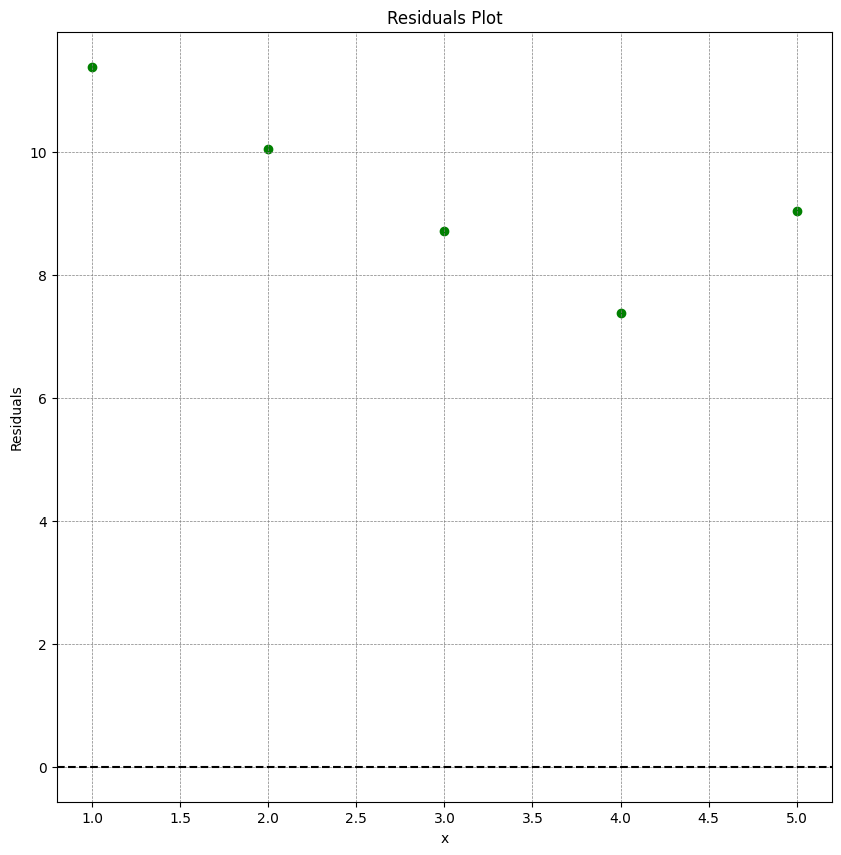

In [4]:
model = SimpleLinearRegression()
model.fit('Exercise 1.xlsx')  # Replace with the path to your Excel file

x = np.array([1, 2, 3, 4, 5])
y = np.array([5, 6, 7, 8, 12])

r2_score = model.r_squared(x, y)
print(f"R squared Score: {r2_score}")

model.plot_regression(x, y)


model.plot_regression(x, y, data=True)


model.plot_residuals(x, y)